<h2>Team Members:</h2>
    1.Nirush</br> 
  <br>  2.Sanjana </br>
  <br> 3.Sayeesh</br>
  <br> 4.Meghana</br>

<h2> Project Objective </h2>

Flight delays are a modern-day problem. Passengers, airlines, and airports all suffer from these delays, which are inconvenient and costly.
This project analyzes flight delay data in order to gain a better understanding of how commercial aviation operates and to anticipate when delays are likely.

## CRISM-DM PROCESS

### Importing the Dataset

In [1]:
## Importing the necessary libraries :
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
## Loading the data :
df = pd.read_csv('flights 2.csv')
airlines_data = pd.read_csv('airlines.csv')
airport_data = pd.read_csv('airports.csv')

/Users/sanjana/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


We need to identify the charecteristics of our dataset .For this we use three methods:-
<br>info()-Used for identifying the different features and data types in a dataset.
<br>shape()-We used this method to get an idea of the rows and columns in a dataframe.
<br>head()-We used this method to examine the first few rows of the dataset
<br>describe()-We used this method to identify the summary statistic's of all the features of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [4]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [6]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [7]:
airlines_data.describe()

,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,OO,American Airlines Inc.
freq,1,1


In [8]:
airport_data.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [9]:
airport_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [10]:
airport_data.head(30)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [11]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

### Based on the above df.isnull().sum(), Cancellation reason, air system delay, security delay, airline delay, late aircraft delay and weather delay have the highest number of null values, hence we drop them.

In [12]:
# Dropping the columns with highest number of null values: 
cols_to_drop = ['CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df.drop(cols_to_drop, axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

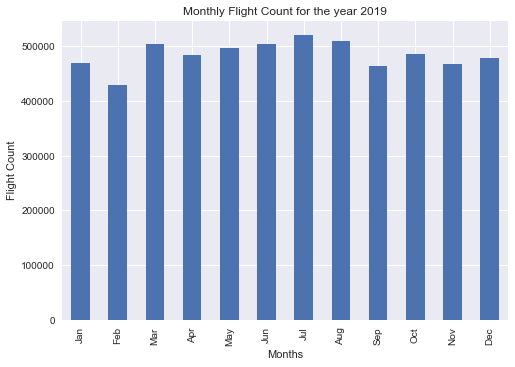

In [14]:
# plot the monthly data
plt.style.use('seaborn')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.groupby('MONTH').count()['FLIGHT_NUMBER'].plot(kind="bar")
plt.xlabel("Months")
plt.xticks(labels=labels, ticks=np.arange(0,12,1))
plt.ylabel("Flight Count")
plt.title("Monthly Flight Count for the year 2019")
plt.show()

## Monthly flight count for the year 2019 was fairly equal

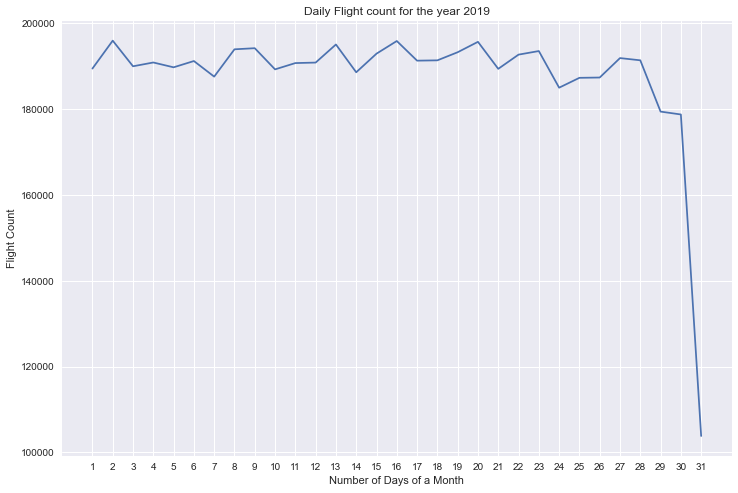

In [15]:
# Plot the daily flight data for the year 2015
df.groupby('DAY').count()['AIRLINE'].plot(figsize=(12,8))
plt.xlabel("Day of the Month")
plt.xticks(np.arange(1, 32, 1))
plt.ylabel("Flight Count")
plt.title("Daily Flight count for the year 2019")
plt.show()

# As Day 31 is not present in all the months, we can see that daily flight count for that day is the least and in the other days it is fairly distributed.

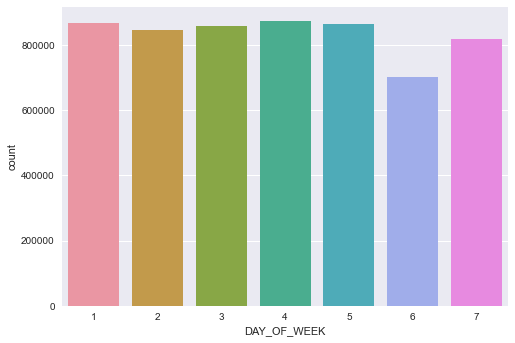

In [16]:
# plot the distribution of flights across DAY_OF_WEEK
sns.countplot(data=df, x='DAY_OF_WEEK')
plt.show()

### From the above graph, we can infer that there is a fairly equal distribution of flights across all days of the week.

In [17]:
# Merge flights_data with airlines_data
df = pd.merge(left = df, right = airlines_data, left_on='AIRLINE', right_on='IATA_CODE').rename(columns={'AIRLINE_y' : 'AIRLINE'})

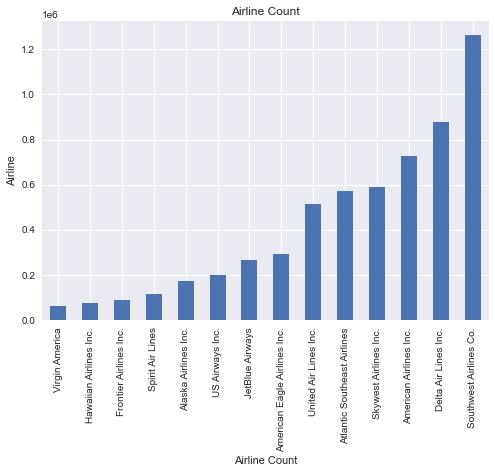

In [18]:
# Plot the AIRLINE count distribution
df['AIRLINE'].value_counts().sort_values().plot(kind='bar')
plt.ylabel("Airline")
plt.xlabel("Airline Count")
plt.title("Airline Count")
plt.show()

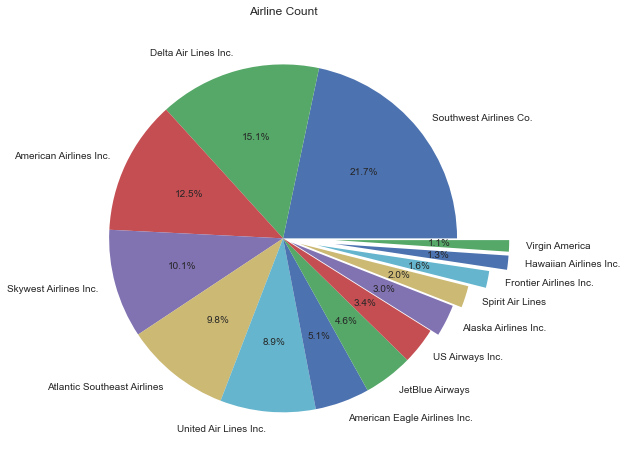

In [19]:
airlines_labels = list(df['AIRLINE'].value_counts().index)
plt.figure(figsize=(15,8))
plt.pie(df['AIRLINE'].value_counts(), autopct = '%1.1f%%', labels = airlines_labels, explode = (0,0,0,0,0,0,0,0,0,0.05,0.1,0.2,0.3,0.3))
plt.title("Airline Count")
plt.show()

In [20]:
# Print the most flying airline with the total number of fligths in the year 2015
most_flying_airline = df['AIRLINE'].value_counts().index[0]
max_flights = df['AIRLINE'].value_counts().iloc[0]

print("The airlines with most number of flights in the year 2019 is {}".format(most_flying_airline))
print("Maximum flights in the year 2019 are {:,}".format(max_flights))

The airlines with most number of flights in the year 2019 is Southwest Airlines Co.
Maximum flights in the year 2019 are 1,261,855


<AxesSubplot:>

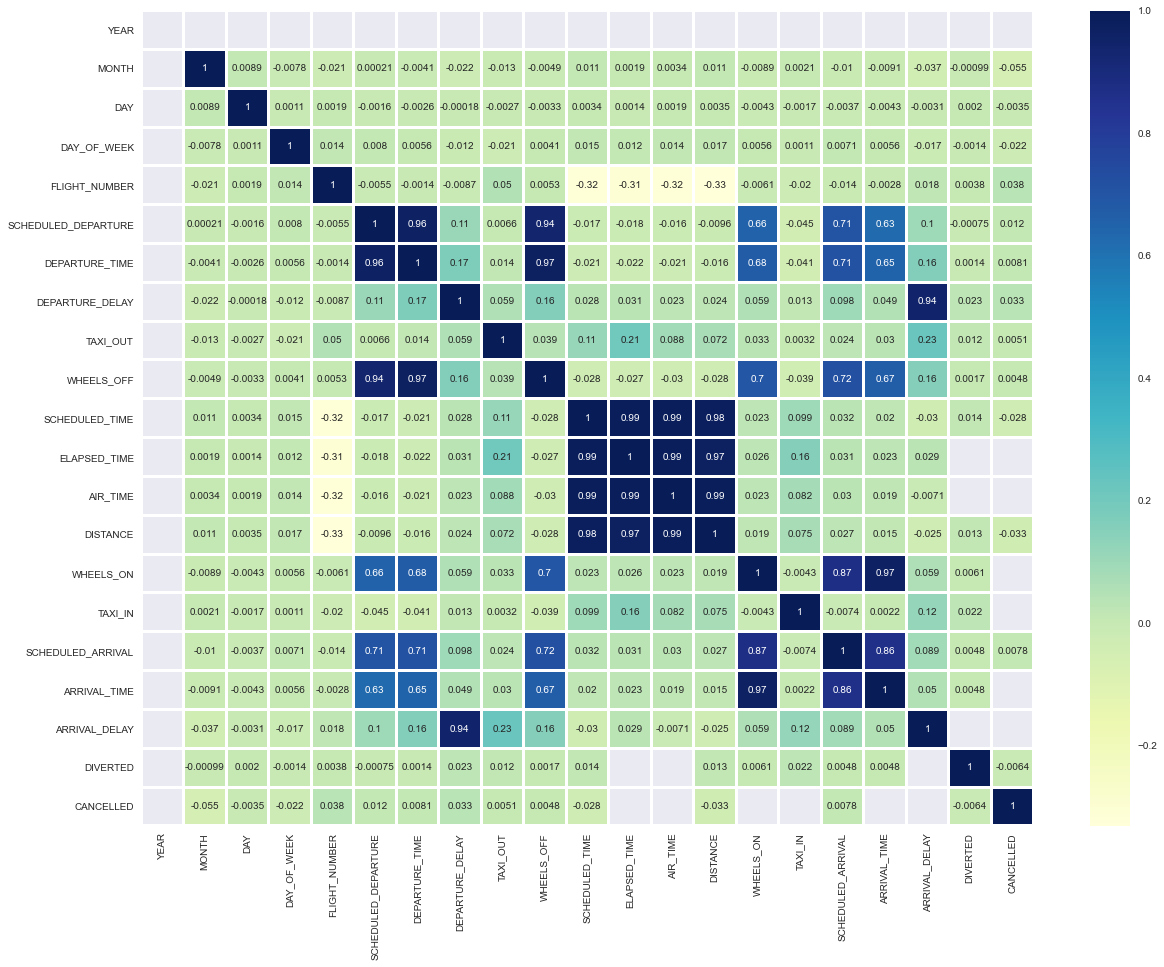

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, linewidth=2, cmap='YlGnBu')

In [22]:
# filtering out unnecessary columns
df1=df.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN'],axis=1)
df1

,MONTH,DAY,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE
0,1,1,AS,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,AS
1,1,1,AS,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,AS
2,1,1,AS,ANC,SEA,45,-4.0,509,455.0,-14.0,0,0,AS
3,1,1,AS,ANC,PDX,50,-4.0,525,507.0,-18.0,0,0,AS
4,1,1,AS,FAI,SEA,115,-8.0,548,545.0,-3.0,0,0,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,VX,LGA,DAL,1855,-8.0,2200,2154.0,-6.0,0,0,VX
5819075,12,31,VX,BOS,SFO,1859,-10.0,2250,2204.0,-46.0,0,0,VX
5819076,12,31,VX,SFO,LAS,1940,-7.0,2110,2052.0,-18.0,0,0,VX
5819077,12,31,VX,LAX,LAS,1950,-2.0,2055,2044.0,-11.0,0,0,VX


In [23]:
df2 = df1[0:300000]
df2

,MONTH,DAY,AIRLINE_x,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,IATA_CODE
0,1,1,AS,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,AS
1,1,1,AS,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,AS
2,1,1,AS,ANC,SEA,45,-4.0,509,455.0,-14.0,0,0,AS
3,1,1,AS,ANC,PDX,50,-4.0,525,507.0,-18.0,0,0,AS
4,1,1,AS,FAI,SEA,115,-8.0,548,545.0,-3.0,0,0,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,3,30,AA,FLL,DFW,1200,-3.0,1421,1422.0,1.0,0,0,AA
299996,3,30,AA,DFW,MSY,1203,-2.0,1338,1321.0,-17.0,0,0,AA
299997,3,30,AA,PBI,DFW,1205,8.0,1420,1428.0,8.0,0,0,AA
299998,3,30,AA,DFW,MIA,1205,22.0,1600,1555.0,-5.0,0,0,AA


In [24]:
df2=df2.fillna(df2.mean())

In [25]:
result=[]


In [26]:
for row in df2['ARRIVAL_DELAY']:
  if row > 15:
    result.append(1)
  else:
    result.append(0)

In [27]:
df2['result'] = result

In [28]:
df2.value_counts('result')

result
0    252928
1     47072
dtype: int64

In [29]:
# removing some more columns
df2=df2.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIRLINE_x', 'IATA_CODE'],axis=1)
df2

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,DIVERTED,CANCELLED,result
0,1,1,5,-11.0,430,0,0,0
1,1,1,25,-1.0,320,0,0,0
2,1,1,45,-4.0,509,0,0,0
3,1,1,50,-4.0,525,0,0,0
4,1,1,115,-8.0,548,0,0,0
...,...,...,...,...,...,...,...,...
299995,3,30,1200,-3.0,1421,0,0,0
299996,3,30,1203,-2.0,1338,0,0,0
299997,3,30,1205,8.0,1420,0,0,0
299998,3,30,1205,22.0,1600,0,0,0


## Modeling

In [30]:
data = df2.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)  # splitting in the ratio 70:30


In [31]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

 ### <b> Logistic Regression </b>
 
Logistic Regression is used to predict the probability of a target variable.

R-Squared value This value ranges from 0 to 1. Value ‘1’ indicates predictor perfectly accounts for all the variations in Y. Value ‘0’ indicates that predictor ‘x’ accounts for no variation in ‘y’.



In [32]:
model_lr = LogisticRegression()
result = model_lr.fit(X_train, y_train)

In [33]:
from sklearn import metrics
prediction_test1 = model_lr.predict(X_test)
# Printing the prediction accuracy from training on logistic regression
print ('The accuracy of the Logistic Regression  is',metrics.accuracy_score(y_test, prediction_test1))

The accuracy of the Logistic Regression  is 0.9308111111111111


### Decision Tree
Decision Tree algorithm is used to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.


In [34]:
#DecisionTree
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
preds=model_dt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_test,preds))

The accuracy of the Decision Tree is 0.8868111111111111


### Random forest

Random Forest algorithm builds multiple decision trees and merges them together to get a more accurate and stable prediction.



In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

#accuracy given Random forest and printing the accuracy given by the random forest algorithm
preds = model_rf.predict(X_test)
print ('The accuracy of the Random forest is',metrics.accuracy_score(y_test, preds))

The accuracy of the Random forest is 0.9331333333333334


### Naive Bayes
Naïve Bayes is a simple learning algorithm that utilizes Bayes rule together with a strong assumption that the attributes are conditionally independent, given the class.



In [36]:
#NaiveBayes
model_gnb = GaussianNB(priors=None)
model_gnb.fit(X_train, y_train)
preds = model_gnb.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8195666666666667

## Evaluation

In [37]:
import plotly.offline as py #Model Performance
py.init_notebook_mode(connected=True)
import plotly.figure_factory as ff
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score


In [38]:
def model_report(model,X_train, X_test, y_train, y_test,name) :
    model.fit(X_train,y_train)
    predictions  = model.predict(X_test)
    accuracy     = accuracy_score(y_test,predictions)
    recallscore  = recall_score(y_test,predictions)
    precision    = precision_score(y_test,predictions)
    roc_auc      = roc_auc_score(y_test,predictions)
    f1score      = f1_score(y_test,predictions) 
    kappa_metric = cohen_kappa_score(y_test,predictions)
    
    df3 = pd.DataFrame({"Model"           : [name],
                       "Accuracy score"  : [accuracy],
                       "Recall score"    : [recallscore],
                       "Precision"       : [precision],
                       "F1 score"        : [f1score],
                       "Area under curve": [roc_auc],
                       "Kappa metric"    : [kappa_metric],
                      })
    return df3

#outputs for every model
model1 = model_report(model_lr,X_train, X_test, y_train, y_test, "Logistic Regression")
model2 = model_report(model_dt,X_train, X_test, y_train, y_test,"Decision Tree")
model3 = model_report(model_rf,X_train, X_test, y_train, y_test,"RF Classifier")
model4 = model_report(model_gnb,X_train, X_test, y_train, y_test,"Naive Bayes")

model_performances = pd.concat([model1,model2,model3,model4],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)



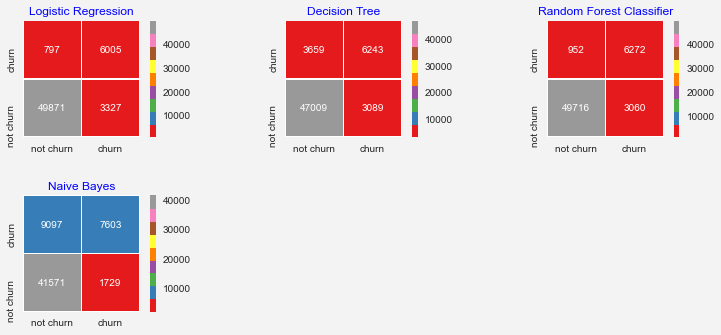

In [39]:
import itertools
import seaborn as sns;
lst    = [model_lr,model_dt,model_rf, model_gnb]

length = len(lst)

mods   = ['Logistic Regression',
          'Decision Tree','Random Forest Classifier', 'Naive Bayes']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(5,3,j+1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    ax = sns.heatmap(conf_matrix,annot = True,fmt = "d",square =True,
                xticklabels=["not churn","churn"],       
                yticklabels=["not churn","churn"],
                linewidths = 0.5, linecolor = "w",cmap = "Set1")
    ax.set_ylim(0 ,2)
    plt.title(k,color = "b")
    plt.subplots_adjust( wspace = .3,hspace = .5)

## Plottting Area Under Curve

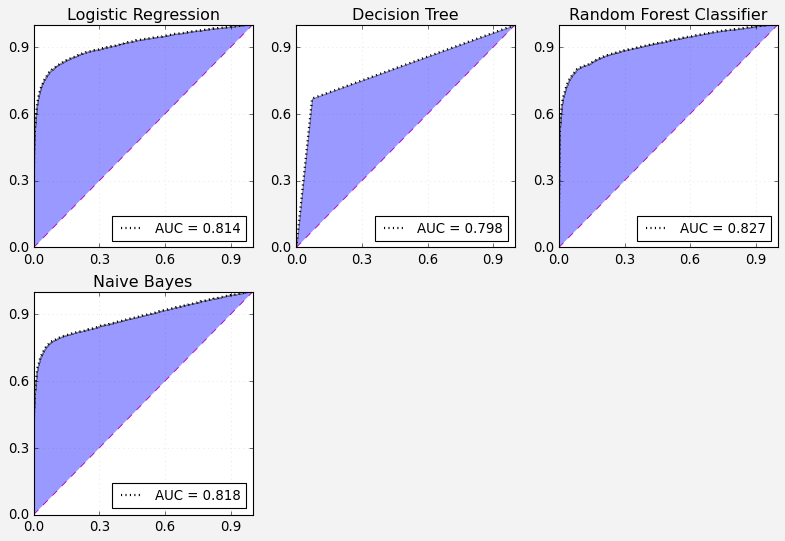

In [40]:
plt.style.use("classic")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods):
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "k",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "m",linewidth = 0.8)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "w")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("w")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "k")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))